### Proyek Analisis Data: E-Commerce Public Dataset (Sumber)

#### Email: abdurrahmanabdulhamid207@gmail.com
#### Nama: Abdurrahman Abdul Hamid
#### ID Dicoding: spiderwitch

### Pertanyaan

#### 1. Berapa rata-rata panjang product disetiap category rentang 500 - 1200?
#### 2. Berapa jumlah orang yang menggunakan jenis metode pembayaran?

### Import Library/Package

In [33]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

### Data Wrangling

#### Gathering Data

+ #### products_dataset

In [2]:
product_data = pd.read_csv("data/products_dataset.csv")

In [3]:
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


+ #### order_payments_dataset

In [4]:
order_payments_data = pd.read_csv("data/order_payments_dataset.csv")

In [5]:
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Assesing Data

+ #### Assesing products_dataset

In [6]:
products_data = pd.read_csv("data/products_dataset.csv")
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [7]:
products_data.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [8]:
print("Jumlah duplikasi: ", products_data.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


+ #### Assesing order_payments_dataset

In [10]:
order_payments_data = pd.read_csv("data/order_payments_dataset.csv")
order_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
order_payments_data.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", order_payments_data.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
order_payments_data.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [14]:
data = {
    ' ': [' products_dataset', 'products_dataset'], 
    'Tipe Data': ['2 (object)', '2 (object)'], 
    'Missing Value': ['2448', '0'], 
    'Duplicate data': ['0', '0'],
    'Inaccurate value': ['-', '-'],
}
 
df = pd.DataFrame(data)
df

,,Tipe Data,Missing Value,Duplicate data,Inaccurate value
0,products_dataset,2 (object),2448,0,-
1,products_dataset,2 (object),0,0,-


#### Cleaning Data

In [15]:
products_data[products_data.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
products_data.product_weight_g.value_counts()

product_weight_g
200.0     2084
300.0     1561
150.0     1259
400.0     1206
100.0     1188
          ... 
6075.0       1
822.0        1
631.0        1
2925.0       1
1920.0       1
Name: count, Length: 2204, dtype: int64

In [17]:
products_data.fillna(value=200.0, inplace=True)

In [18]:
products_data.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### Explorary Data Analysis (EDA)

#### Explore products_dataset

In [19]:
products_data.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,51.281994,760.915572,5.850930,2276.346454,30.825347,16.948772,23.207460
std,NaN,NaN,22.808009,633.907155,26.719752,4281.939332,16.965224,13.711512,12.156965
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,52.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [20]:
products_data.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "product_name_lenght": ["max", "min", "mean", "std"]
})

product_id product_name_lenght                     \
                             nunique                 max    min        mean   
product_category_name                                                         
200.0                            610               200.0  200.0  200.000000   
agro_industria_e_comercio         74                60.0   22.0   49.108108   
alimentos                         82                63.0   15.0   46.304878   
alimentos_bebidas                104                60.0   13.0   44.509615   
artes                             55                62.0   24.0   47.090909   
...                              ...                 ...    ...         ...   
sinalizacao_e_seguranca           93                60.0   15.0   47.838710   
tablets_impressao_imagem           9                64.0   34.0   54.000000   
telefonia                       1134                64.0   16.0   50.450617   
telefonia_fixa                   116                63.0   18.0   48.422414   
utilidades_domesticas           2335                64.0    9.0   48.017559   

                                      
                                 std  
product_category_name                 
200.0                       0.000000  
agro_industria_e_comercio   8.377346  
alimentos                  11.797352  
alimentos_bebidas          12.605281  
artes                      10.628879  
...                              ...  
sinalizacao_e_seguranca     9.710248  
tablets_impressao_imagem    8.958236  
telefonia                   9.727747  
telefonia_fixa             11.457408  
utilidades_domesticas      10.462490  

[74 rows x 5 columns]

In [21]:
products_data.groupby(by="product_photos_qty").product_id.nunique().sort_values(ascending=False)

product_photos_qty
1.0      16489
2.0       6263
3.0       3860
4.0       2428
5.0       1484
6.0        968
200.0      610
7.0        343
8.0        192
9.0        105
10.0        95
11.0        46
12.0        35
13.0         9
15.0         8
17.0         7
14.0         5
18.0         2
19.0         1
20.0         1
Name: product_id, dtype: int64

In [22]:
products_data.groupby(by="product_weight_g").product_id.nunique().sort_values(ascending=False)

product_weight_g
200.0      2086
300.0      1561
150.0      1259
400.0      1206
100.0      1188
           ... 
2290.0        1
2288.0        1
2283.0        1
2245.0        1
40425.0       1
Name: product_id, Length: 2204, dtype: int64

#### Explore order_items_dataset

In [23]:
order_payments_data.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [24]:
order_payments_data.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [25]:
order_payments_data.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
})

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  145.034435  213.581061
credit_card     76505      13664.08   0.01  163.319021  222.119311
debit_card       1528       4445.50  13.38  142.570170  245.793401
not_defined         3          0.00   0.00    0.000000    0.000000
voucher          3866       3184.34   0.00   65.703354  115.519185

In [26]:
order_payments_data.groupby(by="payment_installments").order_id.nunique().sort_values(ascending=False)

payment_installments
1     49060
2     12389
3     10443
4      7088
10     5315
5      5234
8      4253
6      3916
7      1623
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: order_id, dtype: int64

In [27]:
order_payments_data.groupby(by="payment_sequential").order_id.nunique().sort_values(ascending=False)

payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
16        6
17        6
18        6
19        6
20        4
21        4
22        3
23        2
24        2
25        2
26        2
27        1
28        1
29        1
Name: order_id, dtype: int64

### Visualization & Explanatory Analysis


### Pertanyaan 1: Berapa rata-rata panjang product disetiap category rentang 500 - 1200?

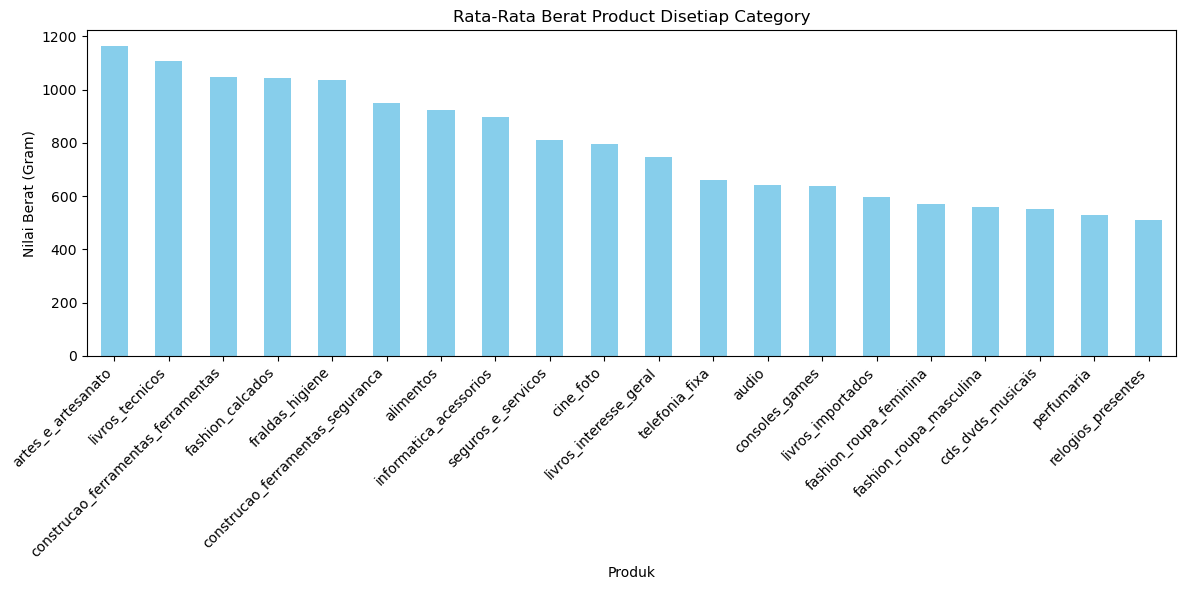

In [49]:
rata_rata_panjang_produk = products_data.groupby('product_category_name')['product_weight_g'].mean().sort_values(ascending=False)

rata_rata_panjang_produk_filtered = rata_rata_panjang_produk[(rata_rata_panjang_produk >= 500) & (rata_rata_panjang_produk <= 1200)]

plt.figure(figsize=(12, 6))
rata_rata_panjang_produk_filtered.plot(kind='bar', color='skyblue')
plt.title('Rata-Rata Berat Product Disetiap Category')
plt.xlabel('Produk')
plt.ylabel('Nilai Berat (Gram)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Berapa jumlah orang yang menggunakan jenis metode pembayaran?

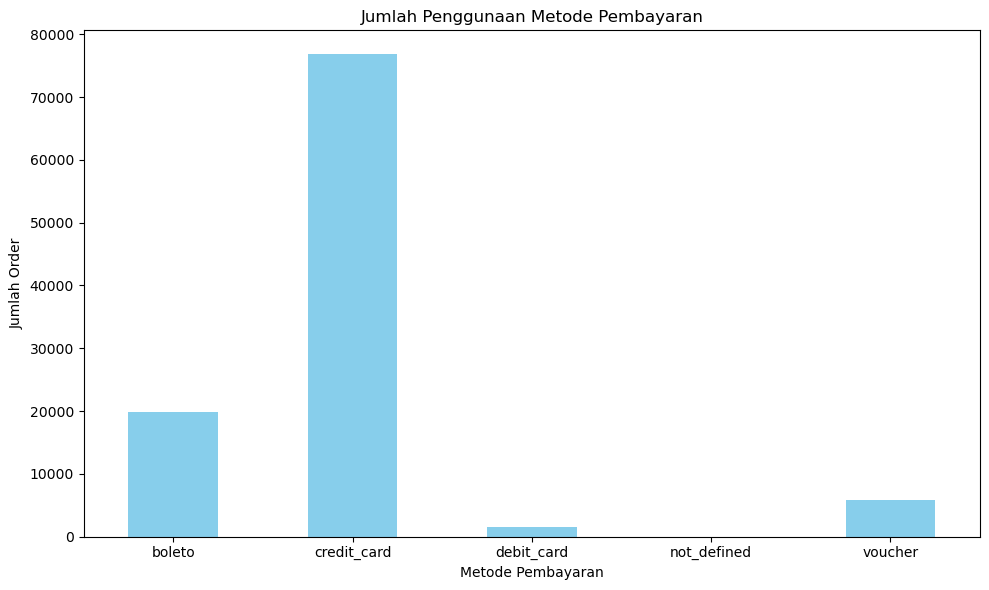

In [55]:
jumlah_metode_pembayaran = order_payments_data.groupby('payment_type')['order_id'].count()

plt.figure(figsize=(10, 6))
jumlah_metode_pembayaran.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penggunaan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Kesimpulan

#### 1. Rata-rata panjang produk disetiap kategori dalam rentang 500 hingga 1200 gram:
+ Rata-rata panjang produk disetiap kategori yang berada dalam rentang 500 hingga 1200 gram dapat dilihat dari visualisasi dengan menggunakan bar plot. Kategori produk yang memiliki rata-rata panjang produk dalam rentang tersebut akan terlihat pada sumbu x, sedangkan nilai berat rata-rata produk (dalam gram) akan ditampilkan pada sumbu y.

#### 2. Jumlah penggunaan metode pembayaran:
   + Jumlah penggunaan metode pembayaran dapat dilihat dari visualisasi dengan menggunakan bar plot. Metode pembayaran yang digunakan akan terlihat pada sumbu x, sedangkan jumlah order yang menggunakan metode tersebut akan ditampilkan pada sumbu y.

Dari kedua visualisasi tersebut, Anda dapat melihat distribusi rata-rata panjang produk untuk setiap kategori dalam rentang tertentu, serta melihat frekuensi penggunaan metode pembayaran yang berbeda. Ini dapat memberikan wawasan yang berguna dalam analisis produk dan kebiasaan pembayaran pelanggan.